In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 


In [46]:
max_tries = 500
b = 4
type = ['counting', 'bloom', 'orig', 'jelly']
type = type[:-1] # TODO: remove line once jellyfish is working
lines_num = [' 52 ', '  57  ', ' 69  ', '  61  ' ] 
lines_num = lines_num[:-1] # TODO: remove line once jellyfish is workin
mem = []

for idx in range(len(type)):
    t = type[idx]
    l = lines[idx]
    # print(t)

    with open('Output/memory_profiler_' + str(max_tries) +
               '_' + str(b) + '_' + t + '.log') as f:
        lines = f.readlines()
    
    lines = lines[6][22:28]
    mem.append(float(lines))


Text(0.5, 1.0, 'Memory Usage for bins = 4, max_tries = 500')

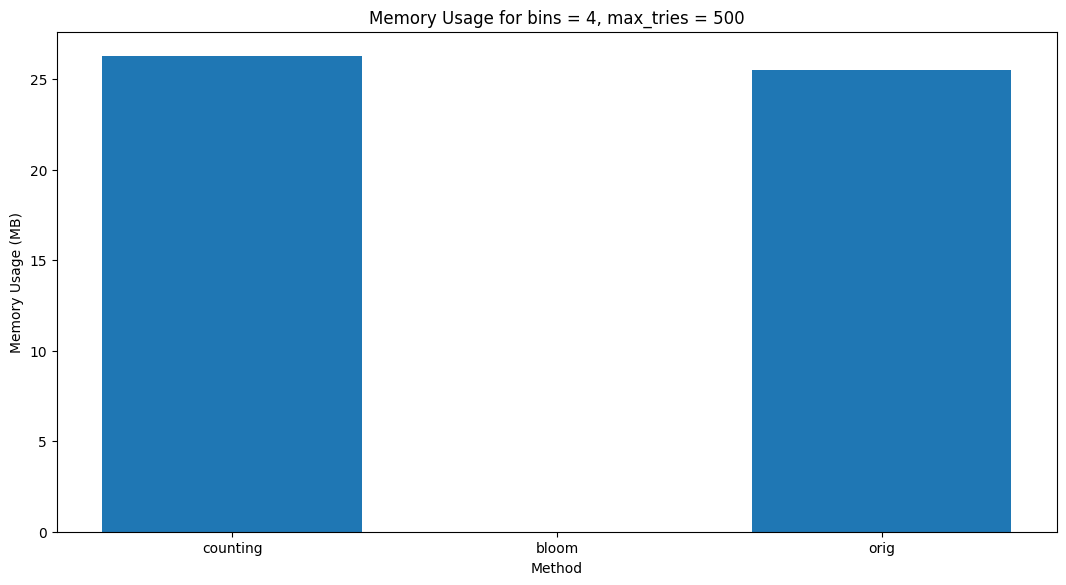

In [53]:
# Plotting memory usage

fig = plt.figure(figsize=(10,5))
ax = fig.add_axes([0,0,1,1])
ax.bar(type,mem)
ax.set_xlabel('Method')
ax.set_ylabel('Memory Usage (MB)')
ax.set_title('Memory Usage for bins = ' + str(b) + ', max_tries = ' + str(max_tries))
plt.show()
plt.savefig('Output/memory_usage_' + str(max_tries) + '_' + str(b) + '.jpg')

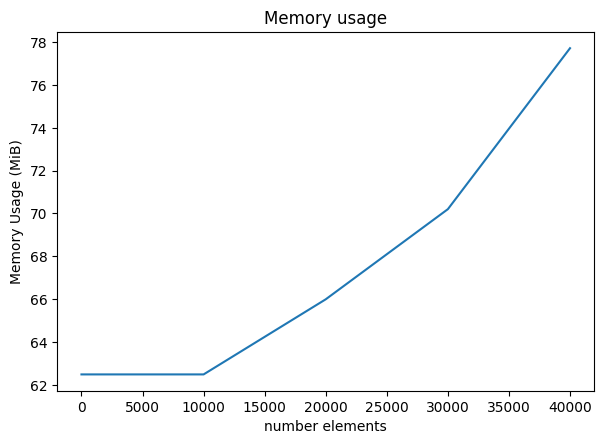

In [18]:
time = pd.read_csv("time_benchmark.csv",delimiter=',',index_col=0)

fig, (ax1, ax2) = plt.subplots(1,1)



ax1.plot(time["query"],label = "query time",color = 'b')
ax1.plot(time["insert_total"],label = "total insert time",color = 'g')
ax1.plot(time["insert_total"]/time.index,label = "insert time per element",color = 'red')
ax1.set_xlabel("number of elements")
ax1.set_ylabel("execution time(ms)")
ax1.set_title("time usage")

ax1.legend()



ax2.set_xlabel("number elements")
ax2.set_ylabel("Memory Usage (MiB)")
ax2.set_title("Memory usage")
ax2.plot(num_items,mem)
fig.tight_layout(pad=2.0)
